In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Leer el archivo de Excel
df = pd.read_excel('data.xlsx', sheet_name='Hoja2', index_col=0)

# Crear una serie de tiempo a partir de los datos leídos
serie = pd.Series(data=df['Demanda'].values, index=pd.to_datetime(df.index))

# a)

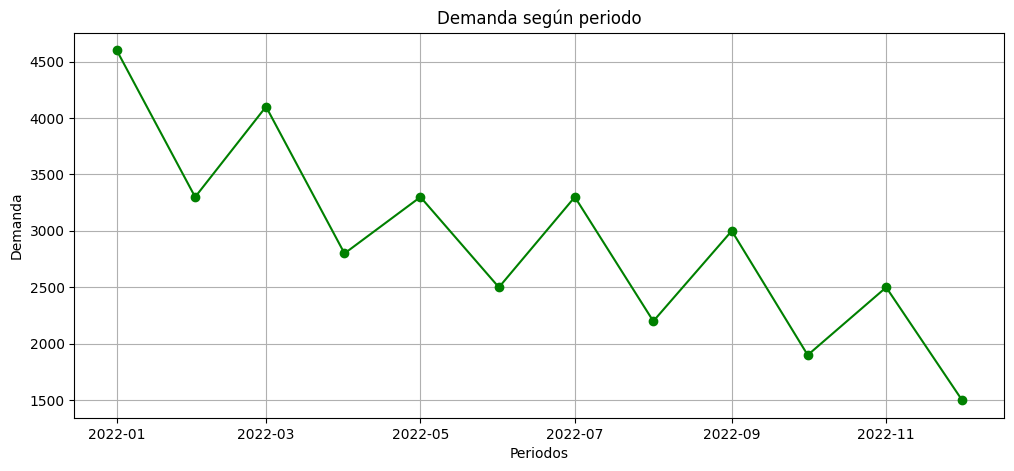

In [4]:
# Graficar periodo y demanda

plt.figure(figsize=(12,5))
plt.plot(serie,'o-',color='green')

plt.xlabel('Periodos')
plt.ylabel('Demanda')
plt.title('Demanda según periodo')
plt.grid()
plt.show()

**Análisis del gráfico:**

Es posible observar una clara tendencia a la baja. Y además podría verse un patrón de estacionalidad cada un número par de periodos debido a que el comportamiento de la demanda se interpreta como repetitivo

# b)

11


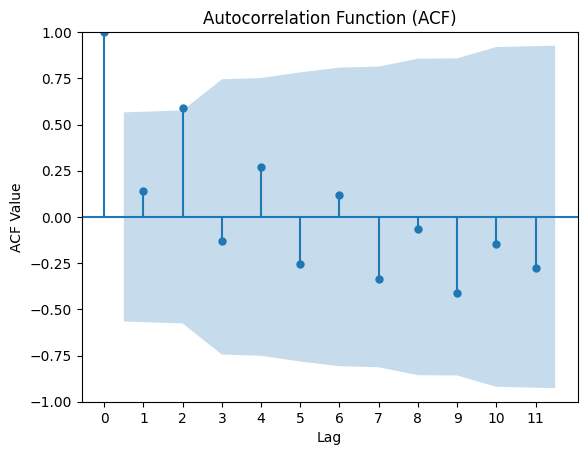

In [5]:
# Obtener la posición del índice '2022-12-01'
posicion = serie.index.get_loc('2022-12-01')
# Imprimir la posición
print(posicion)

#Generar gráfico
plot_acf(serie[:posicion+1])

plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.xticks(range(0,12,1))
plt.show()

La autocorrelación existente sigue un patrón repetitivo cada 2 periodos, pues el valor ACF es el más alto y además supera el umbral de confianza. También su valor ACF sigue el patron repetitivo cada 2 periodos.

# c)

La componente estacional tiene un comportamiento aditivo, pues no existe grandes desviaciones respecto a sus estaciones anteriores. No se logra ver un efecto 'cono'.

Por otra parte, la tendencia parece ser aditiva, pues la demanda va decayendo, sin embargo, no de forma tan drástica.

Todo lo anterior se comprobará según el error cuadrático promedio del modelo.

![image.png](attachment:image.png)

# d)

In [6]:
#Dividimos la data de entrenamiento, y la data de pronostico

train, test = serie[0:8],serie[8:]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train,trend='add', seasonal = 'add',seasonal_periods=2).fit(optimized=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
#Pronosticar valores para el conjunto de prueba
forecast = model.forecast(len(test))

df['Pronostico'] = forecast
print(df)

            Demanda   Pronostico
Fecha                           
2022-01-01   4600.0          NaN
2022-02-01   3300.0          NaN
2022-03-01   4100.0          NaN
2022-04-01   2800.0          NaN
2022-05-01   3300.0          NaN
2022-06-01   2500.0          NaN
2022-07-01   3300.0          NaN
2022-08-01   2200.0          NaN
2022-09-01   3000.0  2767.213081
2022-10-01   1900.0  1674.624062
2022-11-01   2500.0  2349.502924
2022-12-01   1500.0  1256.913905
2023-01-01      NaN  1931.792766
2023-02-01      NaN   839.203747
2023-03-01      NaN  1514.082609
2023-04-01      NaN   421.493590


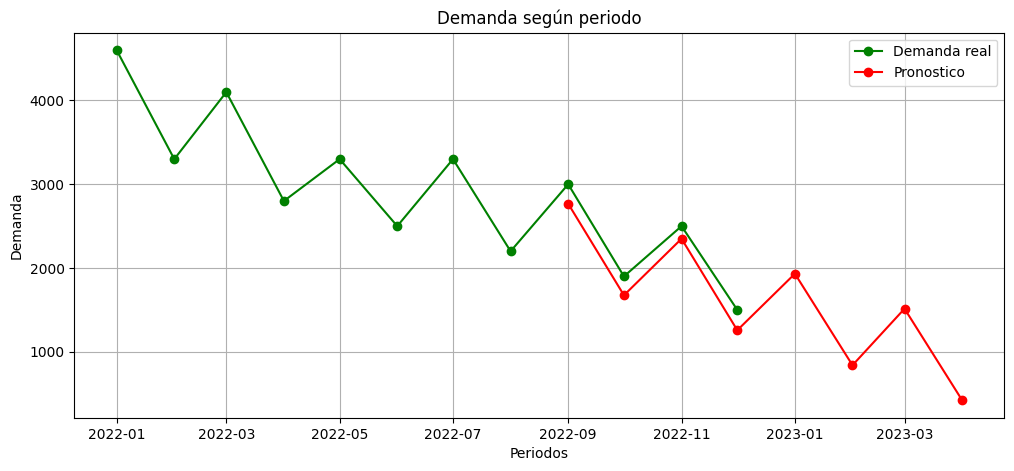

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['Demanda'],'o-',color='green',label='Demanda real')
plt.plot(df.index,df['Pronostico'],'o-',color='red',label='Pronostico')

plt.xlabel('Periodos')
plt.ylabel('Demanda')
plt.title('Demanda según periodo')
plt.grid()
plt.legend()
plt.show()

# e)

In [9]:
# Calcular el MSE
mse = round(mean_squared_error(df.iloc[8:11]["Demanda"], df.iloc[8:11]['Pronostico']),2)
print(f"MSE: {mse}")

model.params_formatted

MSE: 42544.48


,name,param,optimized
smoothing_level,alpha,0.147412,True
smoothing_trend,beta,0.008659,True
smoothing_seasonal,gamma,0.080951,True
initial_level,l.0,4119.825858,True
initial_trend,b.0,-208.896659,True
initial_seasons.0,s.0,514.686988,True
initial_seasons.1,s.1,-344.971093,True


# f)

Para ello generaremos las 4 combinaciones posibles, es decir:

Tendencia - estacionalidad: Multiplicativa-Multiplicativa, Multiplicativa - Aditiva, Aditiva - Multiplicativa, Aditiva - Aditiva

_Nota: Lo siguiente se puede realizar mediante un ciclo for y/o una función._

Tendencia - estacionalidad: Multiplicativa-Multiplicativa

In [ ]:
#Dividimos la data de entrenamiento, y la data de pronostico
train, test = serie[0:8],serie[8:]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train,trend='mul', seasonal = 'mul',seasonal_periods=2).fit(optimized=1)

#Pronosticar valores para el conjunto de prueba
forecast = model.forecast(len(test))

df['mul-mul'] = test
df['mul-mul'] = forecast

#Calcular MSE
mse = round(mean_squared_error(df.iloc[8:11]["Demanda"], df.iloc[8:11]['mul-mul']),2)
print(f"MSE (Multiplicativo-Multiplicativo): {mse}")

In [ ]:
#Dividimos la data de entrenamiento, y la data de pronostico
train, test = serie[0:8],serie[8:]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train,trend='mul', seasonal = 'add',seasonal_periods=2).fit(optimized=1)

#Pronosticar valores para el conjunto de prueba
forecast = model.forecast(len(test))

#Ingresamos la data al df
df['mul-add'] = test
df['mul-add'] = forecast

# Calcular el MSE
mse = round(mean_squared_error(df.iloc[8:11]["Demanda"], df.iloc[8:11]['mul-add']),2)
print(f"MSE (Multiplicativo-Aditivo): {mse}")

In [ ]:
#Dividimos la data de entrenamiento, y la data de pronostico
train, test = serie[0:8],serie[8:]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train,trend='add', seasonal = 'mul',seasonal_periods=2).fit(optimized=1)

#Pronosticar valores para el conjunto de prueba
forecast = model.forecast(len(test))

#Ingresamos la data al df
df['add-mul'] = test
df['add-mul'] = forecast

# Calcular el MSE
mse = round(mean_squared_error(df.iloc[8:11]["Demanda"], df.iloc[8:11]['add-mul']),2)
print(f"MSE (Aditivo-Multiplicativo): {mse}")

In [ ]:
#Dividimos la data de entrenamiento, y la data de pronostico
train, test = serie[0:8],serie[8:]

#Crear y ajustar el modelo de Holt-Winters
model = ExponentialSmoothing(train,trend='add', seasonal = 'add',seasonal_periods=2).fit(optimized=1)

#Pronosticar valores para el conjunto de prueba
forecast = model.forecast(len(test))

#Ingresamos la data al df
df['add-add'] = test
df['add-add'] = forecast

# Calcular el MSE
mse = round(mean_squared_error(df.iloc[8:11]["Demanda"], df.iloc[8:11]['add-add']),2)
print(f"MSE ('Aditivo-Aditivo'): {mse}")

Teniendo en cuenta el MSE como factor principal de decisión. el modelo Aditivo-Aditivo, resulta ser el mejor debido a su menor error.